<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Bayesian Statistics With Baseball Data: Priors and Posteriors

_Authors: Kiefer Katovich (SF), Justin Pounders ; Edited by: Kelly Slatery_

---

Let’s review the general set up for Bayesian modeling. We have:

### $$P\left(\text{model}|\text{data}\right) = \frac{P\left(\text{data}|\text{model}\right)P\left(\text{model}\right)}{P(\text{data})} $$

This is the diachronic interpretation of Bayes' theorem.

It can also be written as:

### $$\text{posterior} \propto \text{likelihood} \times \text{prior}$$

Here, the posterior is an update of our prior belief given the data observed.

In [4]:
# Install pymc3
# !pip install pymc3

In [47]:
# Imports go here.

import numpy as np
import pandas as pd
from scipy.stats import beta
import matplotlib.pyplot as plt
import pymc3 as pm
import seaborn as sns

## Bayesian Analysis of Batting Averages

---

Load in the simple batting average data for players below. There are just four fields in the data set: the player's name, their times at bat, their hits, and their batting average.

> *Note: [This section of the lab is a partial replication of this exercise in R, if you're interested](https://www.r-bloggers.com/understanding-empirical-bayes-estimation-using-baseball-statistics/). Here, we took out the empirical Bayes section because it's not technically a correct interpretation of Bayesian statistical analysis.*

In [5]:
# A:
career_hits = pd.read_csv('./data/career_hits.csv')

### 1) Try to find the top and bottom three hitters according to their average.

What is wrong with using the average to find the three best and worst hitters?

In [6]:
# A:
career_hits.sort_values(by='average').head(3)

,name,hits,at_bat,average
1494,Larry Ciaffone,0,5,0.0
7303,Jay Rogers,0,8,0.0
2552,Ferd Eunick,0,2,0.0


In [7]:
career_hits.sort_values(by='average').tail(3)

,name,hits,at_bat,average
2905,Jackie Gallagher,1,1,1.0
5853,John Mohardt,1,1,1.0
1126,C. B. Burns,1,1,1.0


The hitters are not a good representation because these batters have had not many at bat opportunities. 

### 2) Set up a prior distribution to represent our belief about batting average.

[After doing a quick search online](https://www.google.com/search?q=average+batting+average+for+players+mlb&oq=average+batting+average+for+players+mlb&aqs=chrome..69i57j0.7373j0j4&sourceid=chrome&ie=UTF-8), it looks like the overall batting average for MLB baseball players is around 0.260 (not up-to-date, but we'll use 0.260 for the lab).

Let's make it simple and say that our prior belief is that, out of 100 at-bats, we’ve seen 26 hits. Set up a beta distribution with `alpha=26` and `beta=74` using a function you can import from `scipy.stats`. Plot it.

**Take a look at the beta distribution's mean and variance to justify to yourself that these hyperparamters make sense!**

This is our distribution of beliefs on the batting average (probability of hitting while at bat) for MLB players.

In [30]:
# A:
alpha_prior=26
beta_prior=74
prior_distn = stats.beta(alpha_prior, beta_prior)
prior_distn

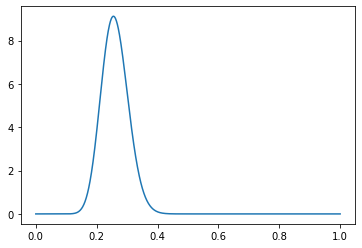

In [27]:
# Create list of percentages for plotting x-axes
x_axes = np.linspace(0,1,1001)
# Plot prior dist'n
plt.plot(x_axes, prior_distn.pdf(x_axes));

### 3) Calculate the maximum a posteriori (MAP) estimate of each player's batting average.

The maximum a posteriori (MAP) estimate is the mode of a posterior distribution for a statistical parameter.

In our case, the MAP estimate for our players' batting averages will be the mode of the posterior beta distribution we get from updating our prior distribution with their at bats and hits.

---

> *Note: For an additional overview of the math behind updating the beta distribution posterior and conjugate priors, ([check out this website](https://alexanderetz.com/2015/07/25/understanding-bayes-updating-priors-via-the-likelihood/)).*

We need to update our beta distribution’s prior belief about batting averages with a player's at-bat and hit information to get a _new_ beta posterior distribution for that player's batting average. 

Luckily, with the beta distribution, the update is just a matter of adding in our new observations to the alpha and beta parameters, where alpha is the number of hits and beta is the number of misses/strikes:

    observed_hits = n_hits
    observed_misses = n_misses
    beta_prior = Beta(prior_hits, prior_misses)
    beta_posterior = Beta(prior_hits + observed_hits, prior_misses + observed_misses)
    
> **Note:** This process will also be useful in the context of A/B testing, which we’ll look at this week.

For each player, update the prior to the posterior distribution and calculate the mode of the distribution. The mode of a beta distribution is conveniently defined as:

### $$ \frac{\alpha - 1}{\alpha + \beta -2} $$

Which means we don't even need to use SciPy's beta distribution function. Just calculate the new alpha and beta for each player's posterior beta distribution (based on the formulas above the **Note**) and plug them into the formula directly above to get the MAP estimate of the batting average for each player.

In [31]:
# A: 
observed_hits = career_hits['hits'] # alpha
observed_misses = career_hits['at_bat']-career_hits['hits'] # beta

alpha_posterior = alpha_prior + observed_hits
beta_posterior = observed_misses - observed_hits+beta_prior
posterior_distn = stats.beta(alpha_posterior, beta_posterior)


In [32]:
career_hits['map']=(alpha_posterior - 1)/ (alpha_posterior + beta_posterior -2)

### 4) Look up the top and bottom batters according to the MAP estimate.

In [41]:
# A:
print('the best')
career_hits.sort_values(by='map', ascending=False).head()

the best


,name,hits,at_bat,average,map
3938,Rogers Hornsby,2930,8173,0.358497,0.553267
4118,Shoeless Joe Jackson,1772,4981,0.355752,0.543393
2109,Ed Delahanty,2596,7505,0.345903,0.523467
3475,Billy Hamilton,2158,6268,0.344288,0.518774
3663,Harry Heilmann,2660,7787,0.341595,0.513876


In [42]:
print('the worst')
career_hits.sort_values(by='map', ascending=True).head()

the worst


,name,hits,at_bat,average,map
2987,Ed Gastfield,6,88,0.068182,0.172222
4322,Mike Jordan,12,125,0.096000,0.175355
4031,John Humphries,52,364,0.142857,0.187805
1899,Enrique Cruz,6,72,0.083333,0.189024
7787,Skeeter Shelton,1,40,0.025000,0.189781


### 5) Plot the MLE batting average against the MAP batting average.
> Hint: What plot will also show the distribution of each (MLE And MAP)?

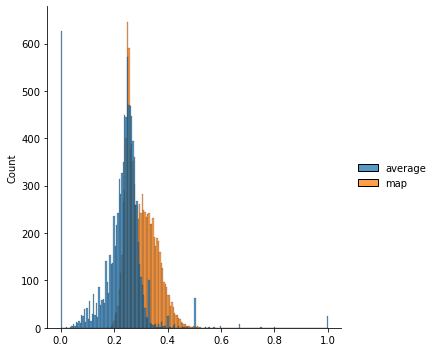

In [53]:
# A:
sns.displot([career_hits['average'], career_hits['map']]) ;  